## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

DATA_FOLDER = 'data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [2]:
# Write your code here
countries = pd.read_csv(COUNTRIES_DATASET, decimal = ',')
countries.head()



,country_name,area,population,literacy
0,afghanistan,647500,31056997,36.0
1,albania,28748,3581655,86.5
2,algeria,2381740,32930091,70.0
3,argentina,2766890,39921833,97.1
4,armenia,29800,2976372,98.6


In [3]:
happiness = pd.read_csv(HAPPINESS_DATASET)
happiness.head(5)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe. Recall the [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) method

In [4]:
#first we create a variable "country_name" for happiness dataframe. This variable
#will be the same for both dataframes so it will be useful to do the merge.
happiness['country_name'] = happiness['country'].apply(lambda r: r.lower())
# Write your code here
country_features = happiness.merge(countries, on="country_name")
country_features = country_features.drop('country_name', axis = 1)
country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6


## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

**Hint**: Recall the [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) method

In [5]:
# Write your code here
sorted_countries = country_features.sort_values('happiness_score', ascending = False)[['country', 'happiness_score']]
sorted_countries.head()

,country,happiness_score
38,Finland,7.8087
31,Denmark,7.6456
115,Switzerland,7.5599
50,Iceland,7.5045
92,Norway,7.4880


In [6]:
where = sorted_countries.country=='Spain'

didnt_found=True
i = 0

while(didnt_found):
    if (where.iloc[i] == True):
        didnt_found = False
    else:
        i+=1
print(i+1)

27


We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

**Hint** Recall the [group_by](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) methods

In [7]:
# Write your code here
average_by_region = country_features.groupby("world_region")['happiness_score'].agg(['mean', 'count'])
average_by_region.sort_values("mean", ascending = False)

,mean,count
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [8]:
# Write your code here
country_features[country_features['world_region']=='North America and ANZ']['country']

5          Australia
21            Canada
88       New Zealand
127    United States
Name: country, dtype: object

## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

**Hint**: Might be useful the [iterrows](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html) method

In [9]:
for idx, row in country_features[country_features.literacy==100].iterrows():
    print("{} - {} ({})".format(row.world_region, row.country, row.happiness_score))

North America and ANZ - Australia (7.222799778)
Western Europe - Denmark (7.645599842)
Western Europe - Finland (7.808700085)
Western Europe - Luxembourg (7.237500191)
Western Europe - Norway (7.487999916000001)


What is the global average?

In [10]:
country_features.literacy.mean()

81.85112781954886

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [11]:
percentage = len(country_features[country_features.literacy<50])/len(country_features)
print("{:.2%}".format(percentage))

11.85%


Print the raw number and the percentage of world population that is illiterate.

In [12]:
illiterate_people = country_features.population * (100-country_features.literacy)/100
illiterate_people

0      1.987648e+07
1      4.835234e+05
2      9.879027e+06
3      1.157733e+06
4      4.166921e+04
           ...     
130    1.698209e+06
131    8.187088e+06
132    1.068518e+07
133    2.231390e+06
134    1.138023e+06
Length: 135, dtype: float64

In [13]:
fraction = illiterate_people.sum()/country_features.population.sum()

print("The total number of illiterate people ", illiterate_people.sum())
print("The percentage is ", fraction*100)

The total number of illiterate people  1249372988.1030002
The percentage is  20.32996582965084


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [14]:
country_features["population_density"] = country_features['population']/country_features['area']
country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0,47.964474
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5,124.587971
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0,13.826065
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1,14.428413
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6,99.878255


What is the happiness score of the 3 countries with lowest population density?

In [15]:
country_features.sort_values("population_density", ascending=True)[['country', 'happiness_score']]

,country,happiness_score
83,Mongolia,5.4562
5,Australia,7.2228
14,Botswana,3.4789
50,Iceland,7.5045
79,Mauritania,4.3746
...,...,...
80,Mauritius,6.1013
9,Bangladesh,4.8328
8,Bahrain,6.2273
78,Malta,6.7728


## Task 6: Healthy and happy?

Plot in scatter plot the happiness score (x) and healthy like expectancy (y).

**Hint**: use the [plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method

<AxesSubplot:xlabel='healthy_life_expectancy', ylabel='happiness_score'>

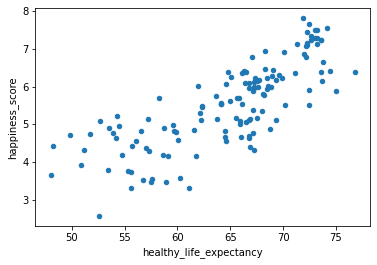

In [16]:
country_features.plot(y="happiness_score", x="healthy_life_expectancy", kind="scatter")

# Let's try to predict happiness

* Define X and y
* Check for NaNs in X
* If there are NaNs, fill them with the mean value for their column
* Get dummies for the categorical feature "world_region"
* Do a 30-70 train test split
* Store the names of the countries that are in test and train datasets
* Drop country names from the train and test datasets
* Fit a machine learning model
* Use the method predict to get predictions for the test dataset
* Create a MSE function to evaluate your model

In [17]:
y = country_features['happiness_score']
X = country_features.drop('happiness_score', axis = 1)

In [18]:
X.isnull().any()
X.isnull().values.sum()

2

In [19]:
avg = X.literacy.mean()
X = X.fillna(avg)

In [20]:
X.isnull().any()

country                     False
social_support              False
healthy_life_expectancy     False
freedom_of_choices          False
generosity                  False
perception_of_corruption    False
world_region                False
area                        False
population                  False
literacy                    False
population_density          False
dtype: bool

In [21]:
X = pd.get_dummies(X, columns = ['world_region'])
X.head()

,country,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,area,population,literacy,population_density,world_region_Central and Eastern Europe,world_region_Commonwealth of Independent States,world_region_East Asia,world_region_Latin America and Caribbean,world_region_Middle East and North Africa,world_region_North America and ANZ,world_region_South Asia,world_region_Southeast Asia,world_region_Sub-Saharan Africa,world_region_Western Europe
0,Afghanistan,0.470367,52.590000,0.396573,-0.096429,0.933687,647500,31056997,36.0,47.964474,0,0,0,0,0,0,1,0,0,0
1,Albania,0.671070,68.708138,0.781994,-0.042309,0.896304,28748,3581655,86.5,124.587971,1,0,0,0,0,0,0,0,0,0
2,Algeria,0.803385,65.905174,0.466611,-0.121105,0.735485,2381740,32930091,70.0,13.826065,0,0,0,0,1,0,0,0,0,0
3,Argentina,0.900568,68.803802,0.831132,-0.194914,0.842010,2766890,39921833,97.1,14.428413,0,0,0,1,0,0,0,0,0,0
4,Armenia,0.757479,66.750656,0.712018,-0.138780,0.773545,29800,2976372,98.6,99.878255,0,1,0,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=33,test_size=0.3)

In [24]:
names_train = X_train['country']
X_train = X_train.drop('country',axis=1)

In [25]:
names_test = X_test['country']
X_test = X_test.drop('country',axis=1)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [27]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [28]:
predictions = rf.predict(X_test)

In [29]:
predictions

array([5.79325203, 4.73606896, 4.64359301, 4.85559099, 5.81089799,
       4.67542801, 6.99611996, 5.26929798, 4.60676498, 5.89085799,
       7.06399792, 5.60441299, 5.91748105, 5.89286899, 6.48845898,
       6.99479594, 4.72493698, 4.66675201, 6.18877498, 7.07269994,
       5.42226903, 5.24796907, 5.96468495, 7.02669592, 5.38101198,
       5.43595198, 7.09380894, 7.03685695, 4.69532598, 4.51246601,
       7.32948096, 4.028847  , 4.70653597, 5.82551599, 7.15945489,
       5.43469897, 4.77793295, 6.03969996, 5.41670299, 7.09641397,
       4.80200997])

In [30]:
def MSE(true, predictions):
    error = true-predictions
    error_squared = error**2
    mse = error_squared.sum()/len(true)
    return mse

In [31]:
MSE(y_test,predictions)

0.3814328416118239

In [32]:
mean_squared_error(y_test,predictions)

0.3814328416118239

In [33]:
names_train.loc[names_train =='Spain']

111    Spain
Name: country, dtype: object

In [34]:
rf.predict([X_train.loc[111]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.51151291])

In [35]:
y_train.loc[111]

6.4008998870000005

In [36]:
names_train.loc[names_train =='France']

39    France
Name: country, dtype: object

In [37]:
rf.predict([X_train.loc[39]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.67340684])

In [38]:
y_train.loc[39]

6.663799762999999

<BarContainer object of 8 artists>

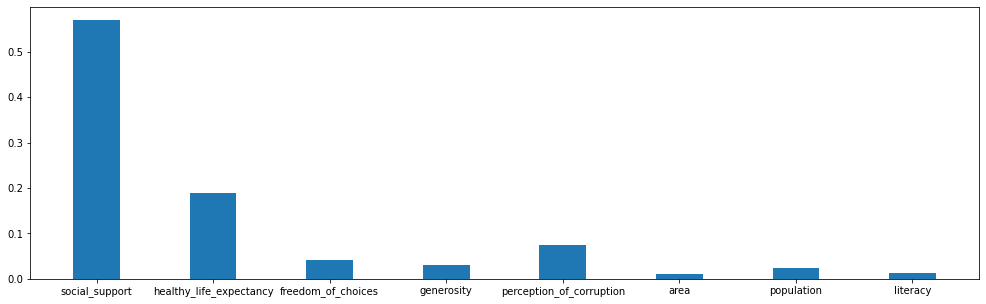

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (17,5))
plt.bar(X_train.columns[:8], rf.feature_importances_[:8], width = 0.4)

In [40]:
country_features.head(2)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0,47.964474
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5,124.587971


In [41]:
cols = country_features.columns
print(cols)

Index(['country', 'happiness_score', 'social_support',
       'healthy_life_expectancy', 'freedom_of_choices', 'generosity',
       'perception_of_corruption', 'world_region', 'area', 'population',
       'literacy', 'population_density'],
      dtype='object')


In [42]:
lalalaland = pd.DataFrame(cols,['lalalaland',12,10,27,0.5,1,0,"South Asia",10,100,0.5,50])

In [43]:
lalalaland.head(2)

,0
lalalaland,country
12,happiness_score
